### Подключаем библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

# Данные файла "ECDCCases.csv"

### Загружаем данные

In [2]:
df = pd.read_csv('ECDCCases.csv')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266


### Использование функции isna()

In [3]:
df.isna().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

### Тепловая карта пропусков

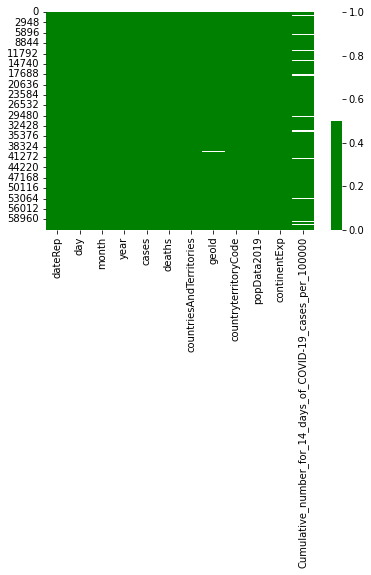

In [4]:
colors = ['green', 'white'] # пропущеные значения - белые
sns.heatmap(df.isna(), cmap=sns.color_palette(colors))
plt.show()

### Процентное содержание пропусков

In [5]:
for column in df.columns:
    missing = np.mean(df[column].isna()*100)
    print(f"{column} : {round(missing, 1)}%")

dateRep : 0.0%
day : 0.0%
month : 0.0%
year : 0.0%
cases : 0.0%
deaths : 0.0%
countriesAndTerritories : 0.0%
geoId : 0.4%
countryterritoryCode : 0.2%
popData2019 : 0.2%
continentExp : 0.0%
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 : 4.7%


### Столбчатая диаграмма пропусков

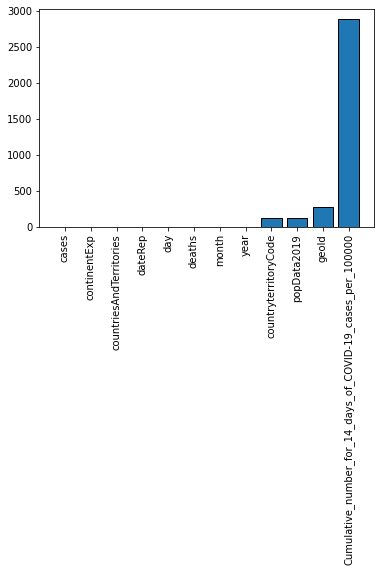

In [6]:
d = dict() # словарь столбцов с количеством пропущенных значений
for column in df.columns: # проход по столбцам
    missing = df[column].isna().sum() # кол-во пропущенных значений в столбце
    without_missing = len(df[column]) - missing # кол-во НЕпропущенных значений в столбце
    d[column] = missing
sorted_list = sorted([(value, key) for (key, value) in d.items()])
sorted_dict = dict([(key, value) for (value, key) in sorted_list])
plt.bar(sorted_dict.keys(), sorted_dict.values(), edgecolor='black')
plt.xticks(rotation = 90)
plt.show()

### Удаление признаков и заполнение пропусков

In [7]:
data = df.drop(['geoId', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], axis=1)
data.countryterritoryCode.fillna('other', inplace=True)
data.popData2019.fillna(data.popData2019.median(), inplace=True)
display(data.head())
data.isna().sum()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
0,14/12/2020,14,12,2020,746,6,Afghanistan,AFG,38041757.0,Asia
1,13/12/2020,13,12,2020,298,9,Afghanistan,AFG,38041757.0,Asia
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
3,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
4,11/12/2020,11,12,2020,63,10,Afghanistan,AFG,38041757.0,Asia


dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
countryterritoryCode       0
popData2019                0
continentExp               0
dtype: int64

### Анализ выбросов

,day,month,year,cases,deaths,popData2019
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.190400e+04
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.091909e+07
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.529798e+08
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09


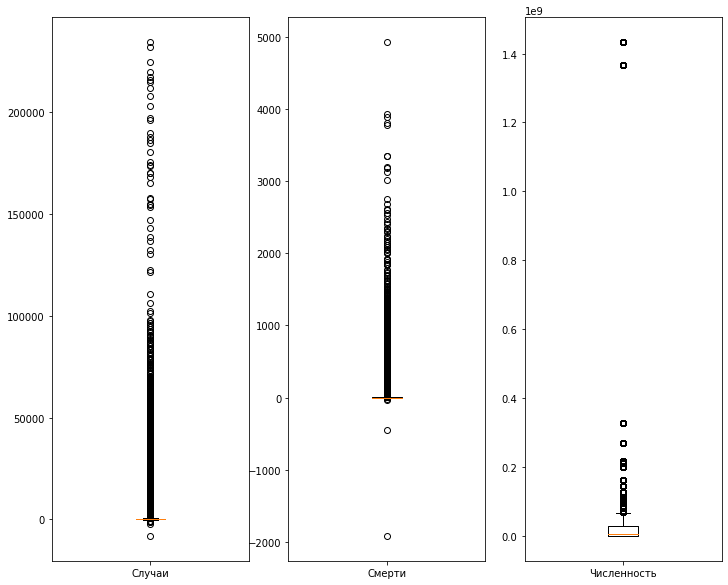

Количество выбросов столбца 'cases': 1699 из общего числа: 61904
Количество выбросов столбца 'deaths': 2320 из общего числа: 61904
Количество выбросов столбца 'popData2019': 2426 из общего числа: 61904

Страны, с превышением смертей в 3000 за день: Argentina, United States of America, Peru, Mexico, Ecuador
Количество дней с превышением смертей в 3000: 11


In [8]:
display(data.describe())

fig, ax = plt.subplots(1, 3, figsize=(12, 10))
ax[0].boxplot(data['cases'],
            labels=['Случаи'])
ax[1].boxplot(data['deaths'],
            labels=['Смерти'])
ax[2].boxplot(data['popData2019'],
            labels=['Численность'])
plt.show()
print("Количество выбросов столбца 'cases':", len(data[data['cases']>(1155.079026+6779.010824)]) + len(data[data['cases']<(1155.079026-6779.010824)]), "из общего числа:", len(data))
print("Количество выбросов столбца 'deaths':", len(data[data['deaths']>(26.053987+131.222948)]) + len(data[data['deaths']<(26.053987-131.222948)]), "из общего числа:", len(data))
print("Количество выбросов столбца 'popData2019':", len(data[data['popData2019']>(4.091909e+07+1.529798e+08)]) + len(data[data['popData2019']<(4.091909e+07-1.529798e+08)]), "из общего числа:", len(data))

print("\nСтраны, с превышением смертей в 3000 за день:", ', '.join(list(set(data[data['deaths'] > 3000]['countriesAndTerritories']))).replace('_', ' '))
print("Количество дней с превышением смертей в 3000:", len(set(data[data['deaths'] > 3000]['dateRep'])))

### Удаление дубликатов

In [9]:
print("Количество дублированных записей:", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Количество дублированных записей после очистки:", data.duplicated().sum())

Количество дублированных записей: 4
Количество дублированных записей после очистки: 0


# Данные файла "bmi.csv"

###

In [10]:
df = pd.read_csv('bmi.csv')
df.head()

,bmi,region
0,22.705,northwest
1,28.880,northwest
2,27.740,northwest
3,25.840,northwest
4,28.025,northwest


### Разделение на выборки и проверка гипотез

In [11]:
north = df[df['region']=='northwest']['bmi']
south = df[df['region']=='southwest']['bmi']

# Критерий Шопиро-Уилка
res1 = sts.shapiro(north)
res2 = sts.shapiro(south)
print(res1, '\n', res2)
if res1[1] > 0.05:
    print('Выборка northwest имеет нормальное распределение')
else:
    print('Выборка northwest имеет НЕ нормальное распределение')
if res2[1] > 0.05:
    print('Выборка southwest имеет нормальное распределение')
else:
    print('Выборка southwest имеет НЕ нормальное распределение')
# Критерий Бартлетт
res = sts.bartlett(north, south)
print('\n', res)
if res[1] > 0.05:
    print('Дисперсии выборок примерно одинаковы')
else:
    print('Дисперсии выборок НЕ одинаковы')
# t-критерий Стьюдента
t_res = sts.ttest_ind(north, south)
print('\n', t_res)
if t_res[1] < 0.05:
    print('Выборки принадлежат к разным генеральным совокупностям')
else:
    print('Выборки принадлежат к одной генеральной совокупности')

ShapiroResult(statistic=0.9954643249511719, pvalue=0.46545225381851196) 
 ShapiroResult(statistic=0.994927167892456, pvalue=0.3630009591579437)
Выборка northwest имеет нормальное распределение
Выборка southwest имеет нормальное распределение

 BartlettResult(statistic=3.4000745256459286, pvalue=0.06519347353581818)
Дисперсии выборок примерно одинаковы

 Ttest_indResult(statistic=-3.2844171500398582, pvalue=0.001076958496307695)
Выборки принадлежат к разным генеральным совокупностям


### Кубик

In [12]:
attempts = 600
observed = [97, 98, 109, 95, 97, 104]
throws = pd.DataFrame({'Points': [1, 2, 3, 4, 5, 6], 'Observed' : observed })
throws['Expected'] = 100 # Ожидаемые значения равномерного распределения
display(throws)
pval = sts.chisquare(throws['Observed'], throws['Expected'])[1]
print('Вероятность того, что наблюдаемые частоты соответствуют равномерному распределению:', pval)

,Points,Observed,Expected
0,1,97,100
1,2,98,100
2,3,109,100
3,4,95,100
4,5,97,100
5,6,104,100


Вероятность того, что наблюдаемые частоты соответствуют равномерному распределению: 0.9198882077437889


### Проверка на зависимость переменных

In [13]:
data = pd.DataFrame({'Женат':[89, 17, 11, 43, 22, 1],
                'Гражданский брак':[80, 22, 20, 35, 6, 4],
                'Не состоит в отношениях':[35, 44, 35, 6, 8, 22]})
data.index = ['Полный рабочий день', 'Частичная занятость',
            'Временно не работает', 'На домохозяйстве',
            'На пенсии', 'Учёба']
display(data)
res = sts.chi2_contingency(data)[1]
print(res)
print('p-значение меньше 0.05, семейное положение влияет на занятость')

,Женат,Гражданский брак,Не состоит в отношениях
Полный рабочий день,89,80,35
Частичная занятость,17,22,44
Временно не работает,11,20,35
На домохозяйстве,43,35,6
На пенсии,22,6,8
Учёба,1,4,22


1.7291616900960234e-21
p-значение меньше 0.05, семейное положение влияет на занятость
